In [21]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools)
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm

from matplotlib import animation

from numpy import *
from pylab import *

from matplotlib import gridspec

import glob

In [22]:
rd = NC.Dataset('ariane_trajectories_qualitative.nc','r');
rd_lont=rd.variables['traj_lon'][:,1::2]
rd_latt=rd.variables['traj_lat'][:,1::2]
rd_dept=rd.variables['traj_depth'][:,1::2]
rd_xs=rd.variables['init_x'][:]
rd_ys=rd.variables['init_y'][:]
print rd_lont.shape


bathy=NC.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][:,:]

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/*.nc'))
ptrc=NC.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

print lon.min(),lon.max()

(220, 6)
-179.997 180.0


In [23]:
print rd_lont.min(),rd_lont.max()
print rd_lont[:,0]

-163.275674682 174.745428669
[23.59932804107666 22.2849602684433 20.792730545891835 19.035182328661087
 17.437650476700192 16.00322465864178 14.560127919163582 13.209309914421672
 12.097202858723966 11.131419735736799 10.125493579074833 9.252744918150116
 8.598137099837693 8.185734666433124 8.13095510597822 8.28298464218518
 8.521160740823605 8.950663410825134 9.4143797081381 9.842117047610724
 10.169175773402255 10.407362311627754 10.624707938737973 10.67398252413214
 10.695577754299023 10.904172284070679 11.028363409720713
 10.945856211717519 10.782929057337478 10.543307702306063 10.2646607797814
 10.083838337882636 9.862626965218409 9.4816963447586 9.153787941701458
 8.849067053752426 8.547484746249568 8.29369373959186 8.069714841838296
 7.926678600293612 7.822790783095167 7.661841663454979 7.484310999045581
 7.340412652379792 7.215127535008628 7.145866576755567 7.171472129408038
 7.209487062675197 7.255933536172421 7.261105059595473 7.284735074836855
 7.350475527977262 7.3900214378

In [24]:
n = np.arange(rd_lont.shape[1])
colors = cm.rainbow(np.linspace(0, 1, len(n)))
colors_ = cm.rainbow(np.linspace(0, 1, len(rd_xs)))

<matplotlib.contour.QuadContourSet instance at 0x7ff742f67ea8>

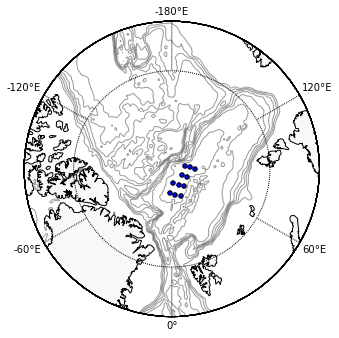

In [43]:
fig = plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1,3)

ax = fig.add_subplot(gs[0,0])
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.scatter(x_lon[580,310],y_lat[580,310])
m.scatter(x_lon[580,315],y_lat[580,315])
m.scatter(x_lon[580,320],y_lat[580,320])
m.scatter(x_lon[590,310],y_lat[590,310])
m.scatter(x_lon[590,315],y_lat[590,315])
m.scatter(x_lon[590,320],y_lat[590,320])
m.scatter(x_lon[600,320],y_lat[600,320])
m.scatter(x_lon[600,315],y_lat[600,315])
m.scatter(x_lon[610,315],y_lat[610,315])
m.scatter(x_lon[610,320],y_lat[610,320])
m.scatter(x_lon[610,325],y_lat[610,325])
m.contour(x_lon[420:-10,:],y_lat[420:-10,:],bathy[420:-10,:],linewidth=0.075,colors='black',alpha=0.4)

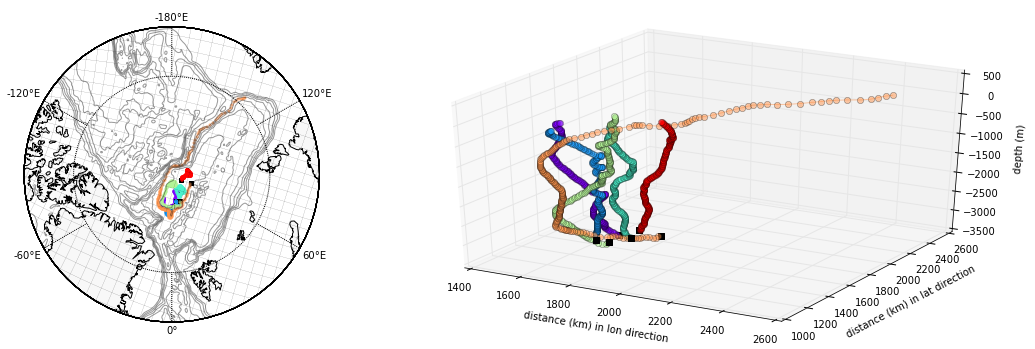

In [37]:
fig = plt.figure(figsize=(18,6))
gs = gridspec.GridSpec(1,3)

ax = fig.add_subplot(gs[0,0])
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.scatter(x_lon[590,315],y_lat[590,315])
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
#for N,c in zip(n,colors):
for N,c in ((n[x],colors[x]) for x in range (6)):
    m.scatter(tracex[0,N],tracey[0,N],c='k',marker='s',s=10)
    m.scatter(tracex[1:,N],tracey[1:,N],marker='o',color=c,label='%s'%N,s=5,alpha=0.5)
m.contour(x_lon[420:-10,:],y_lat[420:-10,:],bathy[420:-10,:],linewidth=0.075,colors='black',alpha=0.4)


ax =fig.add_subplot(gs[0,1:], projection='3d')

for N,c in ((n[x],colors[x]) for x in range (6)):
    ax.plot(tracex[1:-10,N]/1e3,tracey[1:-10,N]/1e3,rd_dept[1:-10,N],color=c,marker='o',alpha=0.5) 
    ax.scatter(tracex[0,N]/1e3,tracey[0,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('distance (km) in lon direction')
ax.set_ylabel('distance (km) in lat direction')
ax.set_zlabel('depth (m)')
ax.view_init(elev=30, azim=-60)
#ax.set_zlim(-1830,-1800)

Black points: starting points


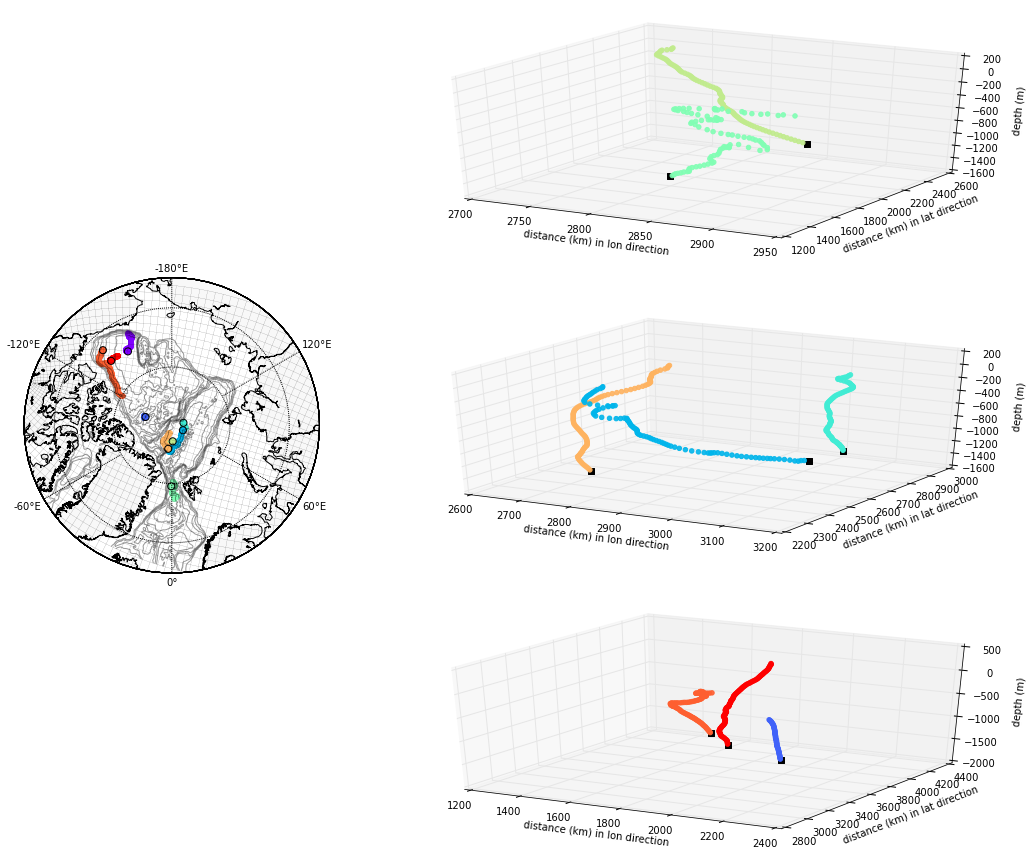

In [11]:
# 3D
n = np.arange(rd_lont.shape[1])
colors = cm.rainbow(np.linspace(0, 1, len(n)))
colors_ = cm.rainbow(np.linspace(0, 1, len(rd_xs)))


fig = plt.figure(figsize=(18,15))
gs = gridspec.GridSpec(3, 3)

ax = fig.add_subplot(gs[:,0])
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.scatter(tracex[1:,N],tracey[1:,N],marker='o',color=c)

# 0/-2  backward/forward
k=0    
m.scatter(tracex[k,:],tracey[k,:],c=colors,s=50)
print 'Black points: starting points'



m.contour(x_lon[420:-10,:],y_lat[420:-10,:],bathy[420:-10,:],linewidth=0.075,colors='black',alpha=0.4)
plt.legend()



ax =fig.add_subplot(gs[0,1:], projection='3d')

for N,c in ((n[x],colors[x]) for x in [4,5]):
    ax.scatter(tracex[1:,N]/1e3,tracey[1:,N]/1e3,rd_dept[1:,N],color=c,alpha=0.9) 
    ax.scatter(tracex[k,N]/1e3,tracey[k,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('distance (km) in lon direction')
ax.set_ylabel('distance (km) in lat direction')
ax.set_zlabel('depth (m)')
ax.view_init(elev=30, azim=-60)
#ax.set_zlim(-1830,-1800)


ax =fig.add_subplot(gs[1,1:], projection='3d')

for N,c in ((n[x],colors[x]) for x in [2,3,6]):
    ax.scatter(tracex[1:,N]/1e3,tracey[1:,N]/1e3,rd_dept[1:,N],color=c,alpha=0.9) 
    ax.scatter(tracex[k,N]/1e3,tracey[k,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('distance (km) in lon direction')
ax.set_ylabel('distance (km) in lat direction')
ax.set_zlabel('depth (m)')
ax.view_init(elev=30, azim=-60)
#ax.set_zlim(-1830,-1800)

ax =fig.add_subplot(gs[2,1:], projection='3d')

for N,c in ((n[x],colors[x]) for x in [1,7,8]):
    ax.scatter(tracex[1:,N]/1e3,tracey[1:,N]/1e3,rd_dept[1:,N],color=c,alpha=0.9) 
    ax.scatter(tracex[k,N]/1e3,tracey[k,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('distance (km) in lon direction')
ax.set_ylabel('distance (km) in lat direction')
ax.set_zlabel('depth (m)')
ax.view_init(elev=30, azim=-60)
#ax.set_zlim(-1830,-1800)

plt.show()

In [ ]:
#1960s for one month

In [26]:
for N,c in ((n[x],colors[x]) for x in [1,2,3]):
    print N

1
2
3
